![alt text](uspas.png)
# Fundamentals of Accelerator Physics and Technology 
### (with Simulations and Measurements Lab)
# Computer Lab: Emittance Dilution
##### Author: E. Harms, N. Neveu, M. Betz

This worksheet demonstrates emittance issues related to matching.  
Questions to be answered and turned in for grade are typeset in **Bold** Type.

### Python Notes: 
- Press shift+enter to execute a cell, or use the play button at the top of the window
- Make sure you exectue cells in order, or re-exectue cells if you change something at the top of the notebook.
- You can also exectue the whole notebook by using 'Run all cells' under the 'Run' tab.
- Repeated variables are appeneded with a number (1,2,3) indicating the section they belong to.
- '2**2' represents two squared, i.e. 2^2
- A colon (:) means all values in that dimension. i.e. array[:,2] = all rows, second column
----------

## 1. Emittance Issues

Large accelerator complexes often are composed of a chain of machines with ever-increasing final energies. It can be challenging to efficiently transfer beams from one accelerator to another while preserving the emittance. Mismatches in the $\beta$-function, steering errors, and thin foils used to isolate vacuum between one ring and another, for example, can all be sources of emittance dilution (growth). In this exercise we look at the effect each of these can have on our particle beam.

In the cells below, inputting an injection offset, $\Delta x$ (dx), or a beta function mismatch, $r_{\beta}$ (r_beta) and looking at the behavior of N particles, 1000 for this case, over a certain number of turns, Nt, we can evaluate the emittance growth.


The first plot below displays the phase space distribution of the N particles after Nt turns. The y-axis plots $p_x = \beta x' +\alpha x$, and the x-axis simply displays x. The other graph displays a histogram of the particle distribution in x. Also shown are the mean value and standard deviation for x. Calculated values of the emittance increase, predicted steering mismatch, and amplitude function mismatch are found at the bottom.

Let’s begin with baseline (ideal) conditions: for $\Delta x =0$ (no position offset), $r_{\beta}=1$ (no beta function mismatch). For Nturns = 0 record: mean xf, stdex (xf), Emittance increase, Steering Mismatch, and Amplitude function mismatch below.

In [1]:
%pylab notebook
from ipywidgets import interact
rcParams['axes.grid'] = True
rcParams['figure.figsize'] = (9, 5)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


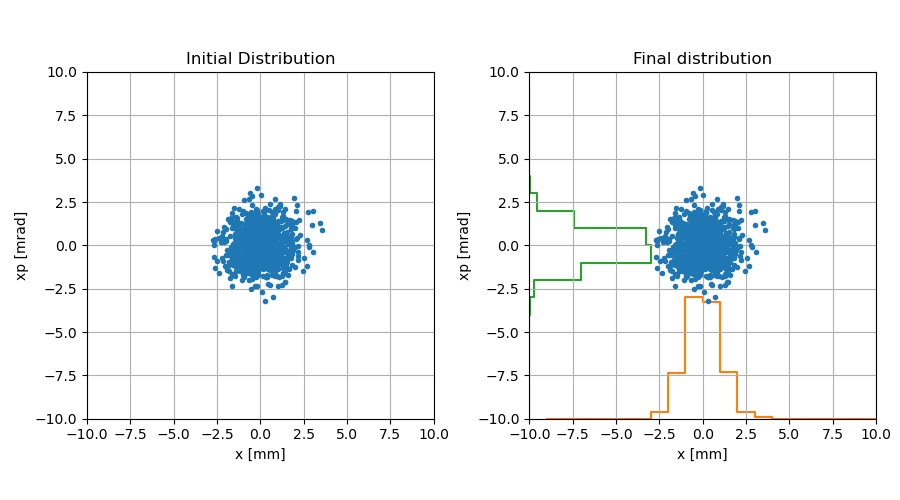

interactive(children=(FloatSlider(value=0.0, description='Nturns', max=200.0), FloatSlider(value=0.0, descript…

<function __main__.update(Nturns=0.0, dx=0.0, r_beta=1.0)>

In [58]:
# Fixed values
N = 1000  #number of particles: initial = 1000
nu_0 = 0.288762 # Small amplitude tune
dnu = 0.002    # Change in tune

std_norm_vals_x = random.normal(size=N)
std_norm_vals_p = random.normal(size=N)

def update(Nturns=0.0, dx=0.0, r_beta=1.0):
    '''
    Nturns: number of turns to simulate
    dx: injection displacement error (units of sigma)
    r_beta: injection focusing error (aspect ratio)
    '''
    # Creating distribution of particles based on standard normal distribution
    x = std_norm_vals_x * sqrt(r_beta) + dx
    p = std_norm_vals_p * 1 / sqrt(r_beta)
    
    # x final and p final 
    ri = sqrt(x**2 + p**2)  # Calculating r
    nu_r = nu_0 + dnu * ri**2  # Tune dependence on amplitude 

    # x final 
    xf = cos(Nturns * 2 * pi * nu_r) * x + sin(Nturns * 2 * pi * nu_r) * p
    # p final 
    pf = -sin(Nturns * 2 * pi * nu_r) * x + cos(Nturns * 2 * pi * nu_r) * p
    
    # update phase spaces
    axs[0].lines[0].set_data(x, p)
    axs[1].lines[0].set_data(xf, pf)
    
    # update histograms
    cnts, bins = histogram(xf, 20, range=(-10, 10))
    axs[1].lines[1].set_data(bins[1:], cnts / 50 - 10)
    cnts, bins = histogram(pf, 20, range=(-10, 10))
    axs[1].lines[2].set_data(cnts / 50 - 10, bins[:-1])
    
    print(f'mean of x_final: {mean(xf):.3f} mm')
    print(f'stdev of x_final: {std(xf):.3f}')
    print(f'Emittance increase of x_final: {std(xf)**2:.3f}')
    
    print('\nPredicted emittance increase due to')
    smm = 1 + 0.5 * dx**2
    print(f'... steering mismatch: {smm:.3f}')
    dbeta = r_beta - 1
    amm = 1 + 0.5 * (dbeta**2 / (1 + dbeta))
    print(f'... amplitude mismatch: {amm:.3f}')


# Setup empty plots
close('all')
fig, axs = subplots(1, 2)

ax = axs[0]
ax.plot([], '.')
ax.set_title('Initial Distribution')

ax = axs[1]
ax.plot([], '.')
ax.plot([], drawstyle='steps-pre', zorder=0)  # x histo
ax.plot([], drawstyle='steps-pre', zorder=0)  # y histo
ax.set_title('Final distribution')

for ax in axs[:2]:
    ax.set_xlabel('x [mm]')
    ax.set_ylabel('xp [mrad]')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.axes.set_aspect('equal')

fig.tight_layout()

interact(update, Nturns=(0, 200, .1), dx=(-5, 5, 0.1), r_beta=(0.1, 5, 0.1))

### Q1) Set Nturns = 100. How do the `mean(x_f)`, `stdev(x_f)`, `Emittance Increase`, and the predicted values of `Steering Mismatch`, and `Amplitude function Mismatch` compare with the Nturns = 0 case?

| Value              | Nturn = 0 | Nturn = 100| 
|--------------------|-----------|------------|
| mean($x_f$)        |           |            | 
| stdev($x_f$)       |           |            |
| Emittance Increase |           |            |
| Pred. Steering Mismatch  |           |            |
| Pred. Amplitude Mismatch |           |            |

----

Return Nturns to 0. We will now analyze the effect of a steering (displacement) error. Set $\Delta x = 2$ (sigma).

### Q2) What values of these parameters are generated for Nturns = 0? Nturns = 100? How many turns does it take for the emittance to reach equilibrium in this situation? hint – look at the trend of how the emittance increases between 0 and 100 turns

| Value              | Nturn = 0 | Nturn = 100          | 
|--------------------|-----------|----------------------|
| mean($x_f$)        | .....     |   ... | 
| stdev($x_f$)       | .....     |   ... | 
| Emittance Increase | .....     |   ... | 
| Steering Mismatch  | .....     |   ... | 
| Amplitude Mismatch | .....     |   ... | 

---
Let’s repeat this for a beta function mismatch. Set $\Delta x =0$ again. Here, the parameter $\delta \beta$ (dbeta) is really $\Delta \beta / \beta$. So, take $r_{\beta} = 2.0$. This makes $\delta \beta = 1$ which is a 100%(!) mismatch of the incoming $\beta$ function.

### Q3) What values of these parameters are generated for Nt = 0? Nt = 100?
How many turns does it take for the emittance to reach equilibrium for
$r_{\beta}= 2.0$? 

  * hint: use the left and right arrow keys on the Nturns slider to get a higher resolution
  * look at the trend of how the emittance increases between 0 and 100 turns


| Value              | Nturn = 0 | Nturn = 100          | 
|--------------------|-----------|----------------------|
| mean($x_f$)        | .....     |   ... | 
| stdev($x_f$)       | .....     |   ... | 
| Emittance Increase | .....     |   ... | 
| Steering Mismatch  | .....     |   ... | 
| Amplitude Mismatch | .....     |   ... | 


### Q4) Which effect has the greater impact on emittance growth?

---

It is possible to model the beam passing through a foil by modifying the x and p input parameters. 

In `update()`
  * replace `sqrt(r_beta)` with `1` (line 15) 
  * replace `1 / sqrt(r_beta)` with `3` (line 16)

Look at the phase space distribution for Nturns = 0. The distribution appears to be ‘standing up’. When a beam passes through a foil, scattering occurs which increases the angular distribution while the beam width stays fixed. Over successive turns the distribution will tumble, finally reaching equilibrium.

### Q5) What values of these parameters are generated for Nt = 0? Nt = 100?
How many turns does it take for the emittance to reach equilibrium? same hint...


| Value              | Nturn = 0 | Nturn = 100          | 
|--------------------|-----------|----------------------|
| mean($x_f$)        | .....     |   ... | 
| stdev($x_f$)       | .....     |   ... | 
| Emittance Increase | .....     |   ... | 
| Steering Mismatch  | .....     |   ... | 
| Amplitude Mismatch | .....     |   ... | 